In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

%matplotlib inline

In [2]:
train=pd.read_csv('airline_train.csv')

In [3]:
pd.set_option('display.max_columns', None)
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
train.info()
#look at data type for each column
#except for Arrival Delay in Minutes, there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
train.nunique()
#id and Unnamed:0 are not useful

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [7]:
train['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [8]:
#our target variable(satisfaction) is not numerical. need to do transformation
def transform(x):
    if x=='neutral or dissatisfied':
        return 0
    else:
        return 1
    

train['satisfaction']=train['satisfaction'].apply(transform)
train['satisfaction'].value_counts()
#0: neutral or dissatisfied
#1: satisfied

0    58879
1    45025
Name: satisfaction, dtype: int64

In [9]:
y = train['satisfaction']

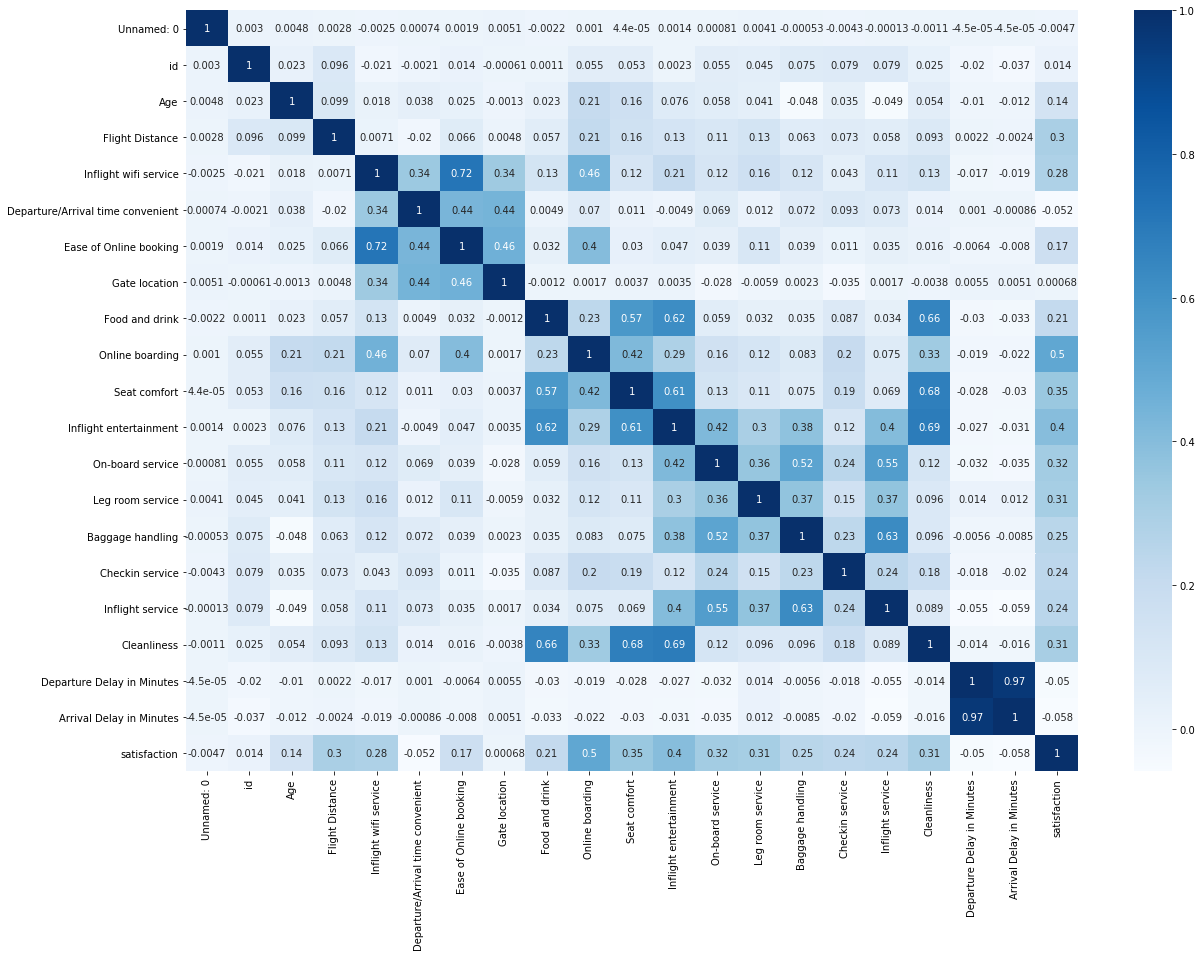

In [10]:
plt.figure(figsize=(20,14))
sns.heatmap(train.corr(), annot=True, cmap='Blues')
#Arrival Delay in Minutes and Departure Delay in Minutes are highly correlated. 
#we can just use Departure Delay in Minutes as variable in our model(Arrival Delay in Minutes has missing values)

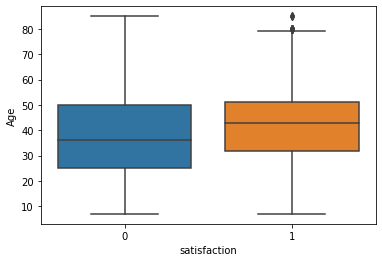

In [11]:
#eda by data visualization
sns.boxplot(x='satisfaction', y ='Age', data=train)

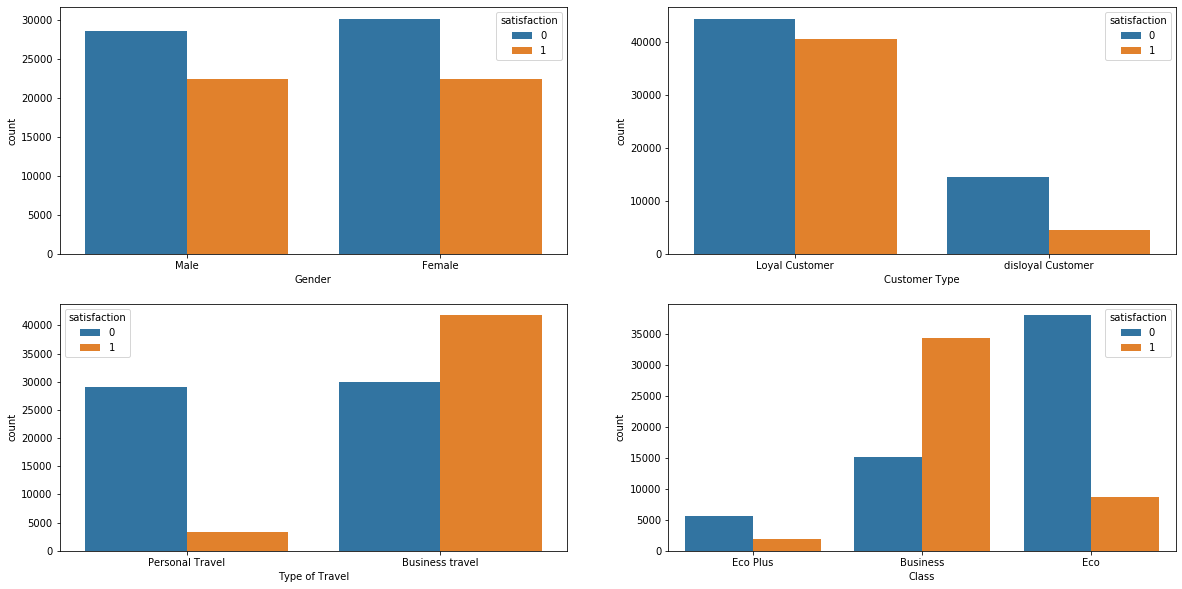

In [12]:
category=['Gender', 'Customer Type', 'Type of Travel', 'Class']

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for x, plot in zip(category, ax.flatten()):
    sns.countplot(train[x],hue=train['satisfaction'], ax=plot)

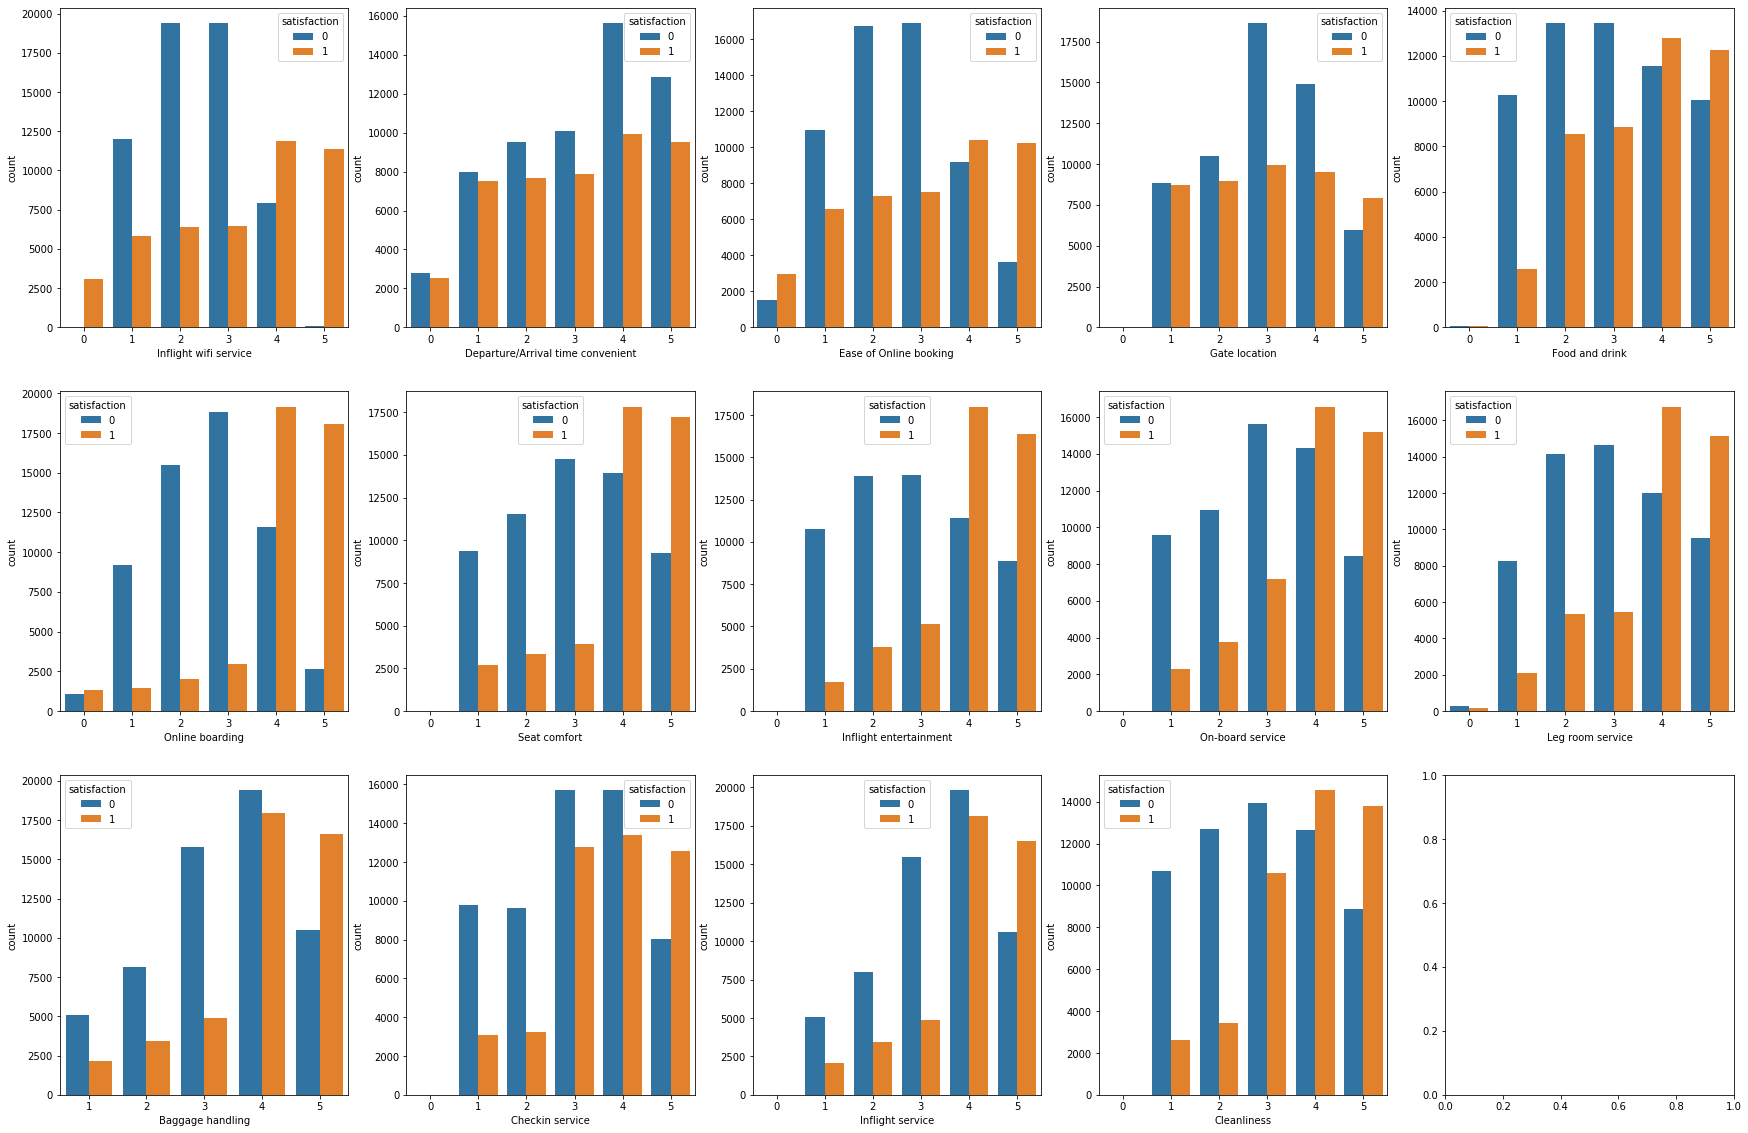

In [13]:
ordinal = ['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 
        'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']

fig, ax = plt.subplots(3, 5, figsize=(30, 20))
for x, plot in zip(ordinal, ax.flatten()):
    sns.countplot(train[x],hue=train['satisfaction'], ax=plot)

In [14]:
#guess for feature importance: Age, gender, Departure/Arrival time conveninet might not be important.

In [15]:
#drop variables we don't need
to_drop = ['satisfaction','Arrival Delay in Minutes','id', 'Unnamed: 0']

X=train.drop(to_drop, axis=1)

In [16]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0


In [17]:
#data preprocessing for numerical and categorical data.

In [18]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [19]:
#for categorical data, we use onehotender to transform str to int
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
    transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[category])

X_train = OneHotEncoding(X_train, enc_ohe, category)
X_test = OneHotEncoding(X_test, enc_ohe, category)

In [20]:
X_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,29,696,3,3,3,4,4,3,2,4,3,5,4,1,3,4,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,26,3987,4,4,4,4,3,3,3,3,3,2,5,4,4,3,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,35,447,1,3,3,3,1,2,1,1,4,1,2,4,5,1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,67,2419,3,2,3,4,1,4,3,5,5,3,3,2,5,2,6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,49,986,4,4,4,2,4,4,2,4,5,3,4,5,4,4,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [21]:
#for Age, Departure Delay in Minutes and Flight Distance, we use StandardScalar to control data range
needss = ['Age', 'Departure Delay in Minutes', 'Flight Distance']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[needss]=scaler.fit_transform(X_train[needss])
X_test[needss]=scaler.fit_transform(X_test[needss])

In [22]:
X_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-0.686493,-0.493586,3,3,3,4,4,3,2,4,3,5,4,1,3,4,-0.390785,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,-0.885141,2.802685,4,4,4,4,3,3,3,3,3,2,5,4,4,3,-0.390785,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.289198,-0.742985,1,3,3,3,1,2,1,1,4,1,2,4,5,1,-0.390785,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.829708,1.232174,3,2,3,4,1,4,3,5,5,3,3,2,5,2,-0.233349,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.637823,-0.203122,4,4,4,2,4,4,2,4,5,3,4,5,4,4,-0.390785,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression()

classifier_KNN = KNeighborsClassifier()

classifier_RF = RandomForestClassifier()

In [24]:
#apply gridsearchcv to find the best parameters
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [25]:
#for logistic regression:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10,100)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=10)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 1, 5, 10, 100), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
print_grid_search_metrics(Grid_LR)

Best score: 0.876051906439541
Best parameters set:
C:1
penalty:l2


In [27]:
best_LR_model = Grid_LR.best_estimator_

In [28]:
#for knn
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=10)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.9291646524762058
Best parameters set:
n_neighbors:9


In [30]:
best_KNN_model = Grid_KNN.best_estimator_

In [31]:
# for random forest
parameters = {
    'n_estimators' : [60,80,100,500],
    'max_depth': [1,5,10,20,40]
}
Grid_RF = GridSearchCV(RandomForestClassifier(random_state=41),parameters, cv=10)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=41,
                                 

In [32]:
print_grid_search_metrics(Grid_RF)

Best score: 0.9623687688835671
Best parameters set:
max_depth:40
n_estimators:500


In [33]:
best_RF_model = Grid_RF.best_estimator_

In [34]:
from sklearn.metrics import f1_score,confusion_matrix,plot_confusion_matrix,accuracy_score

In [35]:
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [37]:
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test))),
     ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Logistic Regression
Accuracy is: 0.8723533940716027
precision is: 0.8650484695824746
recall is: 0.8367542823390431

K nearest neighbor
Accuracy is: 0.9296804824842808
precision is: 0.946016030174446
recall is: 0.8888806851742469

Random Forest
Accuracy is: 0.9630116771461568
precision is: 0.9714633589528955
recall is: 0.9425575900767867



In [38]:
#so random forest performs better

In [40]:
#see feature importance
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, category)

forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

In [47]:
feature=pd.DataFrame({'feature': X_RF.columns.values, 'importance': importances})

In [48]:
feature_order=feature.sort_values(by='importance', ascending=False)

In [49]:
feature_order

,feature,importance
7,Online boarding,0.147319
2,Inflight wifi service,0.136715
22,Type of Travel_Personal Travel,0.071852
23,Class_Business,0.067017
21,Type of Travel_Business travel,0.057848
8,Seat comfort,0.052547
9,Inflight entertainment,0.049958
4,Ease of Online booking,0.037840
24,Class_Eco,0.036793
11,Leg room service,0.036381


Text(0.5, 1.0, 'Feature Importance')

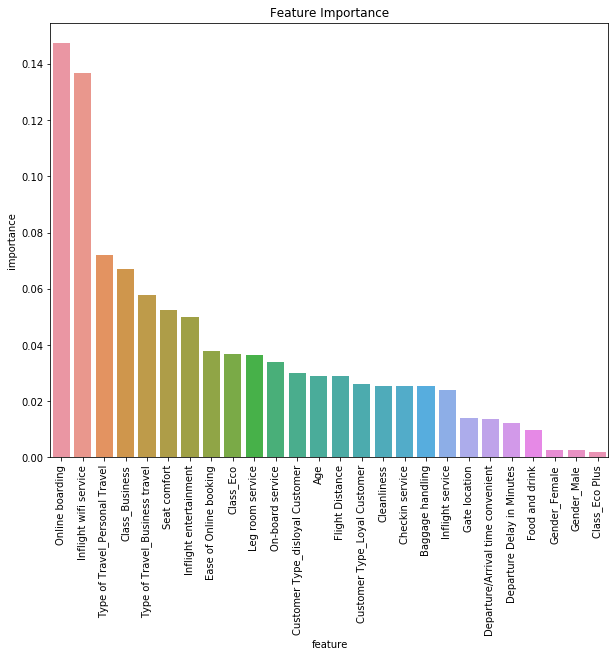

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(y = feature_order['importance'],x = feature_order['feature'])
plt.xticks(rotation=90)
plt.title('Feature Importance')